In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<Axes: ylabel='Product_Category_1'>

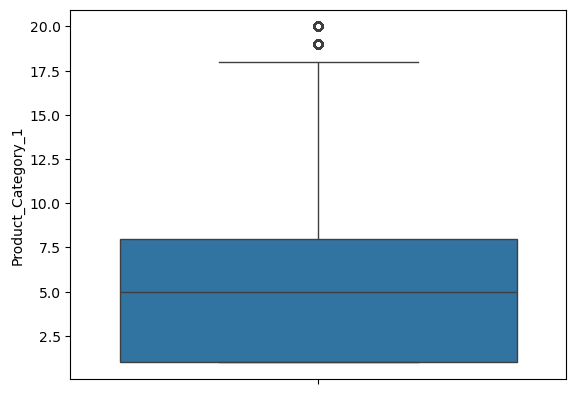

In [4]:
sns.boxplot(data=df['Product_Category_1'])

In [5]:
df=df.dropna().reset_index(drop=True)

In [6]:
gender_count = df['Gender'].value_counts()

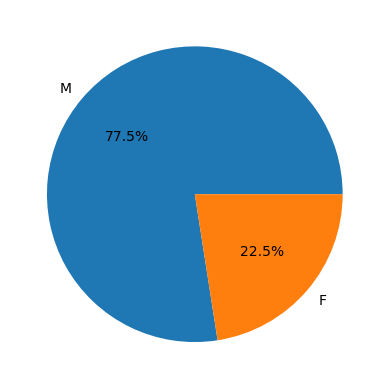

In [7]:
plt.pie(labels=gender_count.index,x=gender_count,autopct='%.1f%%')
plt.show()

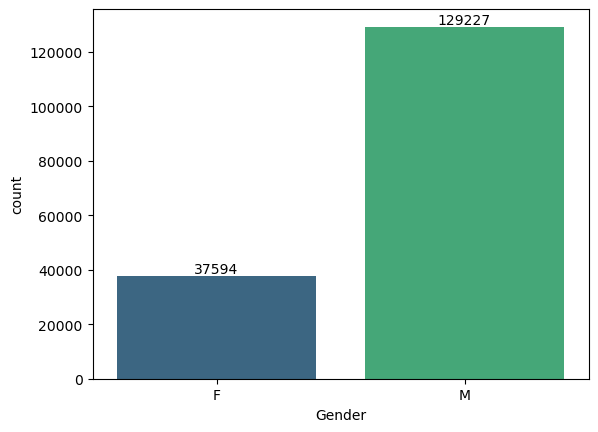

In [8]:
import warnings
warnings.filterwarnings("ignore")
ax=sns.countplot(data=df,x='Gender',palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [9]:
df.nunique()

User_ID                        5870
Product_ID                      528
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               12
Product_Category_2               14
Product_Category_3               15
Purchase                      13876
dtype: int64

In [10]:
Age_purchase = df.groupby('Age')['Purchase'].sum().sort_values(ascending=False)
Age_purchase

Age
26-35    777347110
36-45    390411894
18-25    362666166
46-50    155994042
51-55    134388441
55+       69567842
0-17      54442904
Name: Purchase, dtype: int64

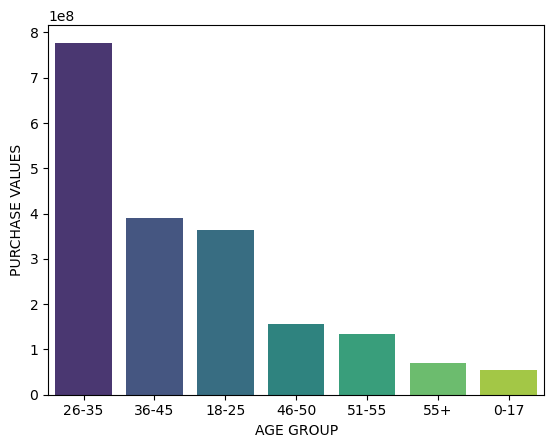

In [11]:
sns.barplot(x=Age_purchase.index,y=Age_purchase.values,palette='viridis')
plt.xlabel("AGE GROUP")
plt.ylabel("PURCHASE VALUES")
plt.show()

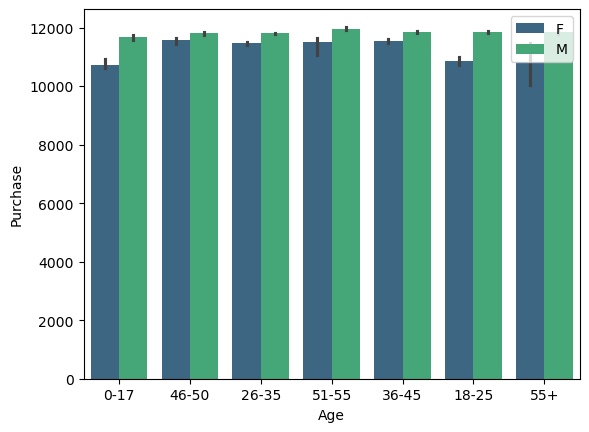

In [12]:
sns.barplot(data=df,x='Age',y='Purchase',estimator=np.median,hue='Gender',palette='viridis')
plt.legend(loc='upper right')
plt.show()

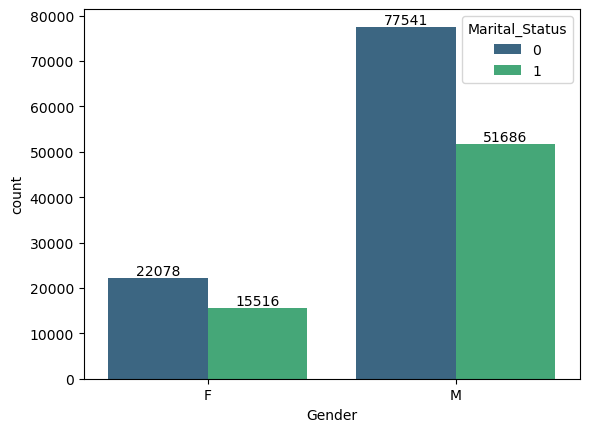

In [13]:
ax=sns.countplot(data=df,x='Gender',hue='Marital_Status',palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [14]:
City_purchase = (
    df.groupby(['City_Category', 'Gender'], as_index=False)['Purchase']
      .sum()
      .sort_values(by='Purchase', ascending=False)
)
City_purchase

,City_Category,Gender,Purchase
3,B,M,625349727
5,C,M,537394941
1,A,M,365354625
2,B,F,170120125
4,C,F,146946254
0,A,F,99652727


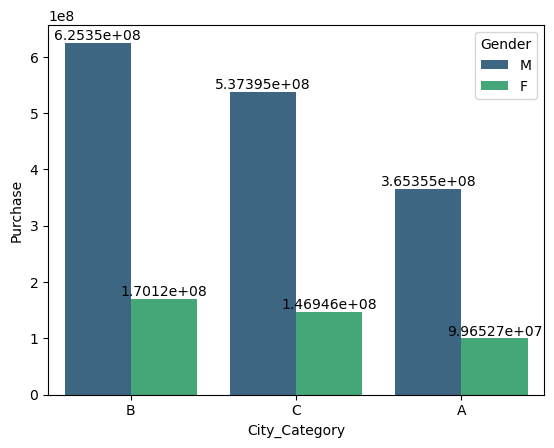

In [15]:
ax=sns.barplot(data=City_purchase,x='City_Category',y='Purchase',hue='Gender',palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [16]:
q1 = df['Product_Category_1'].quantile(0.25)
q3 = df['Product_Category_1'].quantile(0.75)
iqr = q3-q1
iqr

3.0

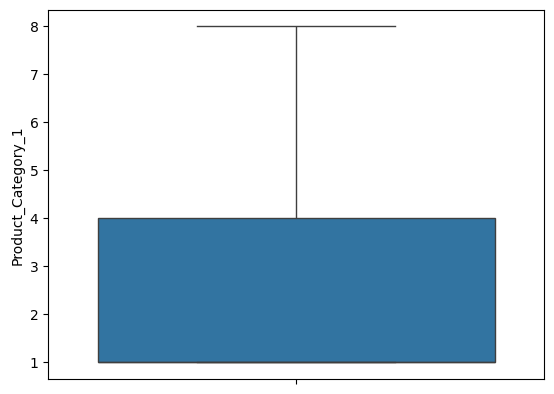

In [17]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
df=df[(df['Product_Category_1']>=lower) & (df['Product_Category_1']<=upper)]
sns.boxplot(data=df['Product_Category_1'])
plt.show()

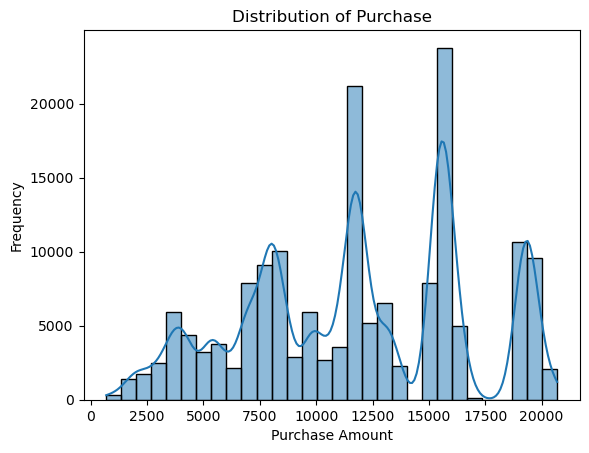

In [19]:
sns.histplot(df['Purchase'], kde=True, bins=30, palette='viridis')
plt.title("Distribution of Purchase")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
sns.histplot(df['Purchase'], kde=True, bins=30, palette='viridis')
plt.title("Distribution of Purchase")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()